# Proyek Analisis Data: [E-commerce-public-dataset]
- **Nama:** [Her Ariyan Mahanani]
- **Email:** [riyanchiyoko@gmail.com]
- **ID Dicoding:** [her_ariyan]

## Menentukan Pertanyaan Bisnis

## Import Semua Packages/Library yang Digunakan

In [4]:
#load semua library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import FuncFormatter 

## Data Wrangling

### Gathering Data

#### Membaca file CSV ke dalam DataFrame dan Menampilkan beberapa baris pertama dari data

In [8]:
orders_df = pd.read_csv( r"D:\Project\dicoding.com\submission\E-commerce-public-dataset\orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
order_items_df = pd.read_csv( r"D:\Project\dicoding.com\submission\E-commerce-public-dataset\order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
sellers_df = pd.read_csv( r"D:\Project\dicoding.com\submission\E-commerce-public-dataset\sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
products_df = pd.read_csv( r"D:\Project\dicoding.com\submission\E-commerce-public-dataset\products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
product_category_df = pd.read_csv( r"D:\Project\dicoding.com\submission\E-commerce-public-dataset\product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### Insight :
1. dataframe orders_df, order_items_df, dan sellers_df adalah dataframe yang di butuhkan untuk menemukan seller dengan total nilai penjualan terbanyak pada tahun 2018
2. dataframe orders_df, order_items_df, products_df dan product_category_df adalah dataframe yang di butuhkan untuk menemukan kategori produk yang paling diminati pada tahun 2018

### Assessing Data

#### cek info orders_df

In [16]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


#### cek missing value

In [18]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

#### cek apakah ada duplikasi data order

In [20]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())

Jumlah duplikasi:  0


#### memeriksa parameter statistik dari kolom numerik

In [22]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### cek info order_items_df

In [24]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


#### cek missing value

In [26]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

#### cek apakah ada duplikasi

In [28]:
print("Jumlah duplikasi: ",order_items_df.duplicated().sum())

Jumlah duplikasi:  0


#### memeriksa parameter statistik dari kolom numerik

In [30]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### cek info sellers_df

In [32]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


#### cek missing value

In [34]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

#### cek apakah ada duplikasi

In [36]:
print("Jumlah duplikasi: ",sellers_df.duplicated().sum())

Jumlah duplikasi:  0


#### memeriksa parameter statistik dari kolom numerik

In [38]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


#### cek info products_df

In [40]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


#### cek missing value

In [42]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

#### cek apakah ada duplikasi

In [44]:
print("Jumlah duplikasi: ",products_df.duplicated().sum())

Jumlah duplikasi:  0


#### memeriksa parameter statistik dari kolom numerik

In [46]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### cek info product_category_df

In [48]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


#### cek missing value

In [50]:
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

#### cek apakah ada duplikasi

In [52]:
print("Jumlah duplikasi: ",product_category_df.duplicated().sum())

Jumlah duplikasi:  0


#### memeriksa parameter statistik dari kolom numerik

In [54]:
product_category_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


##### Insight :
1. dataframe orders_df, untuk kolom order_purchase_timestamp, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date tipe datanya adalah obj seharusnya datetime
2. dataframe order_items_df untuk kolom shipping_limit_date tipe datanya adalah obj seharusnya datetime
3. dataframe products_df terdapat missing value yang cukup banyak pada kolom product_category_name, product_name_lenght, product_description_lenght, product_photos_qty masing masing 610 missing value. sedangkan pada kolom product_weight_g, product_length_cm, product_height_cm, product_width_cm  masing masing 2 missing value.
4. dataframe sellers_df tidak terdapat seller_name sehingga hanya dapat menggunakan seller_id

### Cleaning Data

#### cek format tanggal di orders_df

In [58]:
orders_df["order_purchase_timestamp"].head()

0    2017-10-02 10:56:33
1    2018-07-24 20:41:37
2    2018-08-08 08:38:49
3    2017-11-18 19:28:06
4    2018-02-13 21:18:39
Name: order_purchase_timestamp, dtype: object

In [59]:
orders_df["order_delivered_carrier_date"].head()

0    2017-10-04 19:55:00
1    2018-07-26 14:31:00
2    2018-08-08 13:50:00
3    2017-11-22 13:39:59
4    2018-02-14 19:46:34
Name: order_delivered_carrier_date, dtype: object

In [60]:
orders_df["order_delivered_customer_date"].head()

0    2017-10-10 21:25:13
1    2018-08-07 15:27:45
2    2018-08-17 18:06:29
3    2017-12-02 00:28:42
4    2018-02-16 18:17:02
Name: order_delivered_customer_date, dtype: object

In [61]:
orders_df["order_estimated_delivery_date"].head()

0    2017-10-18 00:00:00
1    2018-08-13 00:00:00
2    2018-09-04 00:00:00
3    2017-12-15 00:00:00
4    2018-02-26 00:00:00
Name: order_estimated_delivery_date, dtype: object

#### Mengonversi kolom kolom tanggal ke tipe datetime

In [63]:
orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"], errors='coerce')
orders_df["order_delivered_carrier_date"] = pd.to_datetime(orders_df["order_delivered_carrier_date"], errors='coerce')
orders_df["order_delivered_customer_date"] = pd.to_datetime(orders_df["order_delivered_customer_date"], errors='coerce')
orders_df["order_estimated_delivery_date"] = pd.to_datetime(orders_df["order_estimated_delivery_date"], errors='coerce')

#### cek kembali tipedata

In [65]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 6.1+ MB


#### cek format tanggal di order_items_df

In [67]:
order_items_df["shipping_limit_date"].head()

0    2017-09-19 09:45:35
1    2017-05-03 11:05:13
2    2018-01-18 14:48:30
3    2018-08-15 10:10:18
4    2017-02-13 13:57:51
Name: shipping_limit_date, dtype: object

#### Mengonversi kolom "shipping_limit_date" ke tipe datetime

In [69]:
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"], errors='coerce')

#### cek kembali tipedata

In [71]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### melihat data yang mengandung missing value pada kolom product_category_name 

In [73]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


#### mengidentifikasi nilai mode

In [75]:
mode_value = products_df['product_category_name'].mode()[0]
print(mode_value)

cama_mesa_banho


#### Mengganti missing value dengan mode atau dengan Unknown

In [77]:
#products_df['product_category_name'] = products_df['product_category_name'].fillna(mode_value)
products_df['product_category_name'] = products_df['product_category_name'].fillna("Unknown")

#### Memeriksa hasil penggantian

In [79]:
print(products_df['product_category_name'].isnull().sum()) 

0


#### Mengisi missing value dengan mean (product_name_lenght, product_description_lenght)

In [81]:
mean_product_name_lenght = products_df['product_name_lenght'].mean()
products_df['product_name_lenght'] = products_df['product_name_lenght'].fillna(mean_product_name_lenght)

#### Mengisi missing value dengan mean untuk 'product_description_lenght'

In [83]:
mean_product_description_lenght = products_df['product_description_lenght'].mean()
products_df['product_description_lenght'] = products_df['product_description_lenght'].fillna(mean_product_description_lenght)

#### Mengisi missing value dengan nilai default 0

In [85]:
products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(0)
products_df['product_weight_g'] = products_df['product_weight_g'].fillna(0)
products_df['product_length_cm'] = products_df['product_length_cm'].fillna(0)
products_df['product_height_cm'] = products_df['product_height_cm'].fillna(0)
products_df['product_width_cm'] = products_df['product_width_cm'].fillna(0)

#### Memeriksa apakah masih ada missing value

In [87]:
print(products_df['product_name_lenght'].isnull().sum())
print(products_df['product_description_lenght'].isnull().sum())
print(products_df['product_photos_qty'].isnull().sum())
print(products_df['product_weight_g'].isnull().sum())
print(products_df['product_length_cm'].isnull().sum())
print(products_df['product_height_cm'].isnull().sum())
print(products_df['product_width_cm'].isnull().sum())

0
0
0
0
0
0
0


#### cek missing value

In [89]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#### memeriksa parameter statistik dari kolom numerik

In [91]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.476949,771.495285,2.148463,2276.334315,30.813207,16.936633,23.195320
std,10.150458,629.208849,1.745732,4281.945502,16.915648,13.637779,12.080033
min,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,604.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Insight :
1. dataframe orders_df, untuk kolom order_purchase_timestamp, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date tipe datanya setelah cleansing adalah datetime
2. dataframe order_items_df untuk kolom shipping_limit_date tipe datanya asetlah cleansing adalah datetime
3. dataframe products_df terdapat missing value yang cukup banyak pada kolom product_category_name di isi dengan Unknown, sedangan untuk kolom product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm di isi dengan default value 0.

### Exploratory Data Analysis (EDA)

### Explore ...

#### explor data orders

In [96]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,90733,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,2018-02-27 04:31:10,NaN,NaN,NaN
freq,1,1,96478,NaN,9,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,NaN,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,NaN,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,NaN,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,NaN,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,NaN,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,NaN,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


#### Mengonversi 'order_purchase_timestamp' ke tipe datetime dan filter untuk tahun 2018

In [98]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_2018 = orders_df[orders_df['order_purchase_timestamp'].dt.year == 2018]

#### explor data order_items

In [100]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


#### Step - step menampilkan seller dengan penjualan tertinggi dan terrendah di tahun 2018

In [102]:
orders_with_items = pd.merge(orders_2018, order_items_df, on='order_id')
total_penjualan_per_seller = orders_with_items.groupby('seller_id')['price'].sum().reset_index()
top_sellers = total_penjualan_per_seller.sort_values(by='price', ascending=False)
top_sellers.head(5)

,seller_id,price
680,4869f7a5dfa277a7dca6462dcf3b52b2,138414.60
1419,955fee9216a65b617aa5c0531780ce60,117340.86
1196,7d13fca15225358621be4086e1eb0964,113628.97
159,1025f0e2d44d7041d6cf58b6550e0bfa,105196.71
2331,fa1c13f2614d7b5c4749cbc52fecda94,95013.42


In [103]:
bottom_sellers = total_penjualan_per_seller.sort_values(by='price', ascending=True)
print(bottom_sellers.head(5))

                             seller_id  price
2068  dd533b429f380718b70ad9922c294bae   4.99
584   3d62f86afa7c73be2628a3be1423f5a0   6.00
304   1fa2d3def6adfa70e58c276bb64fe5bb   6.90
687   4965a7002cca77301c82d3f91b82e1a9   8.49
1423  95cca791657aabeff15a07eb152d7841   9.99


#### Step - step menampilkan kategori produk dengan penjualan tertinggi dan terrendah di tahun 2018

In [105]:
merged_df = pd.merge(orders_df, order_items_df, on='order_id', how='inner')
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


#### Mencari hubungan antara orders_df dan order_items_df

#### Mengelompokkan berdasarkan 'order_id' dan menghitung jumlah 'order_item_id' untuk setiap 'order_id'

In [108]:
grouped = order_items_df.groupby('order_id')['order_item_id'].count().reset_index()
one_to_one = grouped[grouped['order_item_id'] == 1]
one_to_many = grouped[grouped['order_item_id'] > 1]
print("\nOne-to-One Relationships:")
print(one_to_one)


One-to-One Relationships:
                               order_id  order_item_id
0      00010242fe8c5a6d1ba2dd792cb16214              1
1      00018f77f2f0320c557190d7a144bdd3              1
2      000229ec398224ef6ca0657da4fc703e              1
3      00024acbcdf0a6daa1e931b038114c75              1
4      00042b26cf59d7ce69dfabb4e55b4fd9              1
...                                 ...            ...
98661  fffc94f6ce00a00581880bf54a75a037              1
98662  fffcd46ef2263f404302a634eb57f7eb              1
98663  fffce4705a9662cd70adb13d4a31832d              1
98664  fffe18544ffabc95dfada21779c9644f              1
98665  fffe41c64501cc87c801fd61db3f6244              1

[88863 rows x 2 columns]


In [109]:
print("One-to-Many Relationships:")
print(one_to_many)

One-to-Many Relationships:
                               order_id  order_item_id
13     0008288aa423d2a3f00fcb17cd7d8719              2
31     00143d0f86d6fbd9f9b38ab440ac16f5              3
39     001ab0a7578dd66cd4b0a71f5b6e1e41              3
43     001d8f0e34a38c37f7dba2a37d4eba8b              2
69     002c9def9c9b951b1bec6d50753c9891              2
...                                 ...            ...
98603  ffd84ab39cd5e873d8dba24342e65c01              2
98626  ffe4b41e99d39f0b837a239110260530              2
98637  ffecd5a79a0084f6a592288c67e3c298              3
98654  fff8287bbae429a99bb7e8c21d151c41              2
98659  fffb9224b6fc7c43ebb0904318b10b5f              4

[9803 rows x 2 columns]


#### Mengambil semua order_items_df yang memiliki 'order_id' dengan lebih dari satu item

In [111]:
one_to_many_items = order_items_df[order_items_df['order_id'].isin(one_to_many['order_id'])]
print(one_to_many_items)

                                order_id  order_item_id  \
13      0008288aa423d2a3f00fcb17cd7d8719              1   
14      0008288aa423d2a3f00fcb17cd7d8719              2   
32      00143d0f86d6fbd9f9b38ab440ac16f5              1   
33      00143d0f86d6fbd9f9b38ab440ac16f5              2   
34      00143d0f86d6fbd9f9b38ab440ac16f5              3   
...                                  ...            ...   
112635  fff8287bbae429a99bb7e8c21d151c41              2   
112640  fffb9224b6fc7c43ebb0904318b10b5f              1   
112641  fffb9224b6fc7c43ebb0904318b10b5f              2   
112642  fffb9224b6fc7c43ebb0904318b10b5f              3   
112643  fffb9224b6fc7c43ebb0904318b10b5f              4   

                              product_id                         seller_id  \
13      368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   
14      368c6c730842d78016ad823897a372db  1f50f920176fa81dab994f9023523100   
32      e95ee6822b66ac6058e2e4aff656071a  a17f621c590ea0f

#### Gabungkan data orders_with_items dengan products untuk mendapatkan kategori produk

In [113]:
orders_with_items_and_category = pd.merge(orders_with_items, products_df, on='product_id')

#### Menghitung jumlah item per kategori produk (menghitung jumlah 'order_item_id' per kategori)

In [115]:
jumlah_item_per_kategori = orders_with_items_and_category.groupby('product_category_name')['order_item_id'].count().reset_index()
top_kategori_by_item = jumlah_item_per_kategori.sort_values(by='order_item_id', ascending=False)
top_5_kategori_by_item = top_kategori_by_item.head(5)
print(top_5_kategori_by_item)

     product_category_name  order_item_id
12            beleza_saude           5951
14         cama_mesa_banho           5884
45  informatica_acessorios           4708
33           esporte_lazer           4527
55        moveis_decoracao           4118


In [116]:
bottom_kategori_by_item = jumlah_item_per_kategori.sort_values(by='order_item_id', ascending=True)
bottom_5_kategori_by_item = bottom_kategori_by_item.head(5)
print(bottom_5_kategori_by_item)

            product_category_name  order_item_id
18              cds_dvds_musicais              1
38  fashion_roupa_infanto_juvenil              3
47                     la_cuisine              4
36                fashion_esporte              5
61                       pc_gamer              5


#### Insight :
1. explor data berfokus pada orders_df pada tahun 2018
2. hubungan antara orders_df dengan order_items_df adalah one to one dan one to many
3. satu order_item_id mewakili satu quantity produk, jadi memungkinkan satu order_id berisi 2 produk yang sama dimana masing-masing produk berada dalam order_item_id berbeda

## Visualization & Explanatory Analysis

### Pertanyaan 1: Menampilkan 5 seller dengan total penjualan tertinggi di tahun 2018

#### Step - step viasualisasi seller dengan total penjualan tertinggi di tahun 2018

In [121]:
merged_ooi_df = pd.merge(orders_df, order_items_df, on='order_id', how='inner')
merged_ooi_df['order_purchase_timestamp'] = pd.to_datetime(merged_ooi_df['order_purchase_timestamp'])
merged_ooi_df['year'] = merged_ooi_df['order_purchase_timestamp'].dt.year
merged_ooi_df_2018 = merged_ooi_df[merged_ooi_df['year'] == 2018].copy()

#### Menghitung total penjualan per seller (seller_id) dengan mengalikan harga dengan jumlah item per order_item

In [123]:
merged_ooi_df_2018['total_sales'] = merged_ooi_df_2018['price'] * merged_ooi_df_2018['order_item_id']

#### Mengelompokkan data berdasarkan seller_id dan menghitung total penjualan untuk setiap seller

In [125]:
seller_sales = merged_ooi_df_2018.groupby('seller_id')['total_sales'].sum().reset_index()
sorted_sellers = seller_sales.sort_values(by='total_sales', ascending=False)
top_5_sellers = sorted_sellers.head(5)

#### Membuat horizontal bar chart

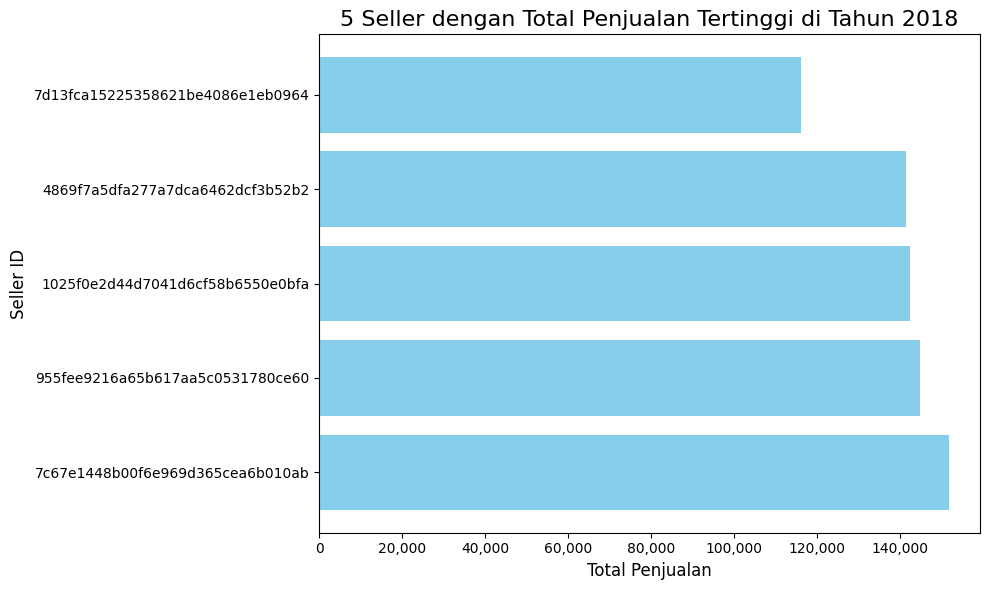

In [127]:
plt.figure(figsize=(10, 6))
plt.barh(top_5_sellers['seller_id'].astype(str), top_5_sellers['total_sales'], color='skyblue')

plt.title('5 Seller dengan Total Penjualan Tertinggi di Tahun 2018', fontsize=16)
plt.xlabel('Total Penjualan', fontsize=12)
plt.ylabel('Seller ID', fontsize=12)
formatter = FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Menampilkan 5 kategori produk dengan penjualan tertinggi dan terendah di tahun 2018

#### Step - step viasualisasi 5 kategori produk dengan penjualan tertinggi dan terendah di tahun 2018

In [130]:
merged_op_df = pd.merge(order_items_df, products_df, on='product_id', how='inner')
merged_op_df = pd.merge(merged_op_df, orders_df, on='order_id', how='inner')
merged_op_df['order_purchase_timestamp'] = pd.to_datetime(merged_op_df['order_purchase_timestamp'])
merged_op_df = merged_op_df[merged_op_df['order_purchase_timestamp'].dt.year == 2018]

#### Mengelompokkan data berdasarkan kategori produk, menghitung total jumlah item yang terjual

In [132]:
category_sales = merged_op_df.groupby('product_category_name')['order_item_id'].count().reset_index()
category_sales.rename(columns={'order_item_id': 'total_items_sold'}, inplace=True)
category_sales_sorted = category_sales.sort_values(by='total_items_sold', ascending=False)
top_categories = category_sales_sorted.head(5)
bottom_categories = category_sales_sorted.tail(5)

#### Membuat subplot untuk menampilkan dua grafik dalam satu gambar

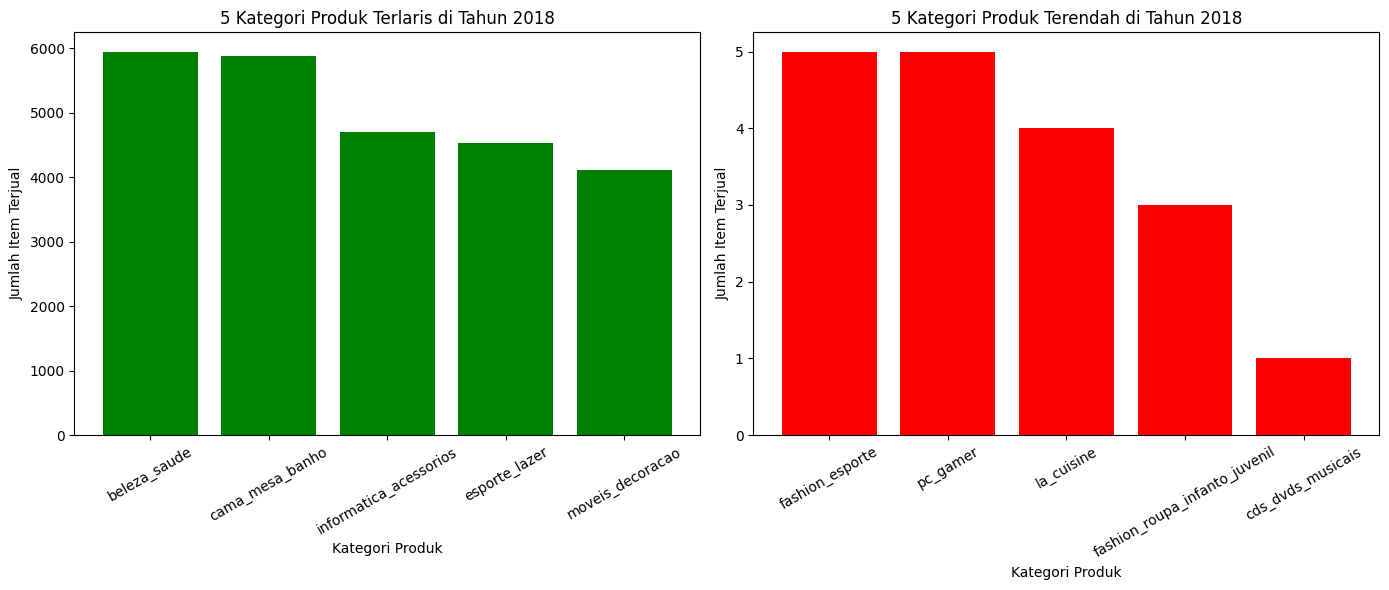

In [134]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
#Grafik untuk 5 kategori produk dengan penjualan terlaris
axes[0].bar(top_categories['product_category_name'], top_categories['total_items_sold'], color='green')
axes[0].set_title('5 Kategori Produk Terlaris di Tahun 2018')
axes[0].set_xlabel('Kategori Produk')
axes[0].set_ylabel('Jumlah Item Terjual')
axes[0].tick_params(axis='x', rotation=30)
#Grafik untuk 5 kategori produk dengan penjualan terendah
axes[1].bar(bottom_categories['product_category_name'], bottom_categories['total_items_sold'], color='red')
axes[1].set_title('5 Kategori Produk Terendah di Tahun 2018')
axes[1].set_xlabel('Kategori Produk')
axes[1].set_ylabel('Jumlah Item Terjual')
axes[1].tick_params(axis='x', rotation=30)
plt.tight_layout()
plt.show()

### Pertanyaan 3: Menampilkan 5 kategori produk dengan penjualan tertinggi setiap bulanya di tahun 2018

#### Step - step viasualisasi line series 5 kategori produk dengan penjualan tertinggi pada tiapu bulan di tahun 2018

In [137]:
merged_df = pd.merge(order_items_df, products_df, on='product_id', how='inner')
merged_df = pd.merge(merged_df, orders_df, on='order_id', how='inner')
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])
merged_df['year_month'] = merged_df['order_purchase_timestamp'].dt.to_period('M')
merged_df = merged_df[merged_df['order_purchase_timestamp'].dt.year == 2018]

#### Mengelompokkan data berdasarkan kategori produk dan bulan, menghitung total jumlah item yang terjual

In [139]:
category_sales = merged_df.groupby(['product_category_name', 'year_month'])['order_item_id'].count().reset_index()
category_sales.rename(columns={'order_item_id': 'total_items_sold'}, inplace=True)
top_categories = category_sales.groupby('product_category_name')['total_items_sold'].sum().nlargest(5).index
top_category_sales = category_sales[category_sales['product_category_name'].isin(top_categories)].copy()
top_category_sales['year_month'] = top_category_sales['year_month'].dt.to_timestamp()

#### Visualisasi: Membuat grafik garis untuk 5 kategori produk teratas

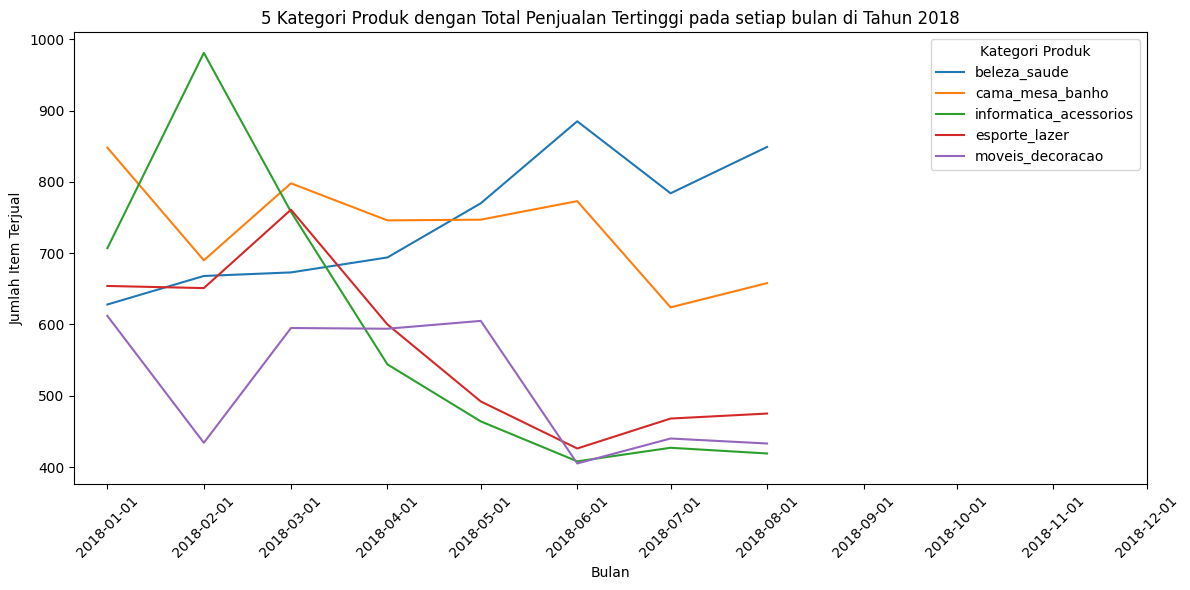

In [141]:
plt.figure(figsize=(12, 6))
#Loop untuk setiap kategori dan plot data per bulan
for category in top_categories:
    category_data = top_category_sales[top_category_sales['product_category_name'] == category]
    plt.plot(category_data['year_month'], category_data['total_items_sold'], label=category)

plt.xlabel('Bulan')
plt.ylabel('Jumlah Item Terjual')
plt.title('5 Kategori Produk dengan Total Penjualan Tertinggi pada setiap bulan di Tahun 2018')
plt.xticks(pd.date_range('2018-01-01', '2018-12-31', freq='MS'), rotation=45)  # Menyusun sumbu X untuk seluruh bulan
plt.legend(title='Kategori Produk')
plt.tight_layout()
plt.show()

#### Insight :
1. Horizontal Bar Chart 5 Seller dengan Total Penjualan Tertinggi di Tahun 2018 menujukan seller dengan total penjualan paling banyak di tahun 2018
2. Bar Chart 5 Kategori Produk Terlaris di Tahun 2018 menunjukkan kategori produk yang memiliki jumlah item terjual tertinggi pada tahun 2018. 
3. Bar Chart 5 Kategori Produk Terendah di Tahun 2018 menunjukkan kategori produk yang memiliki jumlah item terjual terrendah pada tahun 2018. 
4. Line Chart 5 Kategori Produk dengan Total Penjualan Tertinggi pada setiap bulan di Tahun 2018 menunjukan pada bulan apa saja sebuah produk mencapai penjualan tertinggi pada tahun 2018

### Conclusion

#### 1. Conclusion untuk pertanyaan : seller mana sajakah dengan total nilai penjualan tertinggi pada tahun 2018?
- seller yang mencapai total nilai penjualan tertinggi pada tahun 2018 : seller_id 4869f7a5dfa277a7dca6462dcf3b52b2  138414.60, seller_id 955fee9216a65b617aa5c0531780ce60  117340.86, 7d13fca15225358621be4086e1eb0964  113628.97, 1025f0e2d44d7041d6cf58b6550e0bfa  105196.71, fa1c13f2614d7b5c4749cbc52fecda94   95013.42
#### Saran :
Cari tau strategi penjualan dari seller dengan performa tertinggi, seperti strategi pemasaran, jenis produk, dan layanan pelanggan.
Berikan insentif tambahan kepada seller dengan penjualan tinggi untuk meningkatkan loyalitas mereka terhadap platform.
#### 2. Conclusion untuk pertanyaan : kategori produk yang paling diminati dan paling sedikit peminat pada tahun 2018 ?
- kategori produk paling diminati : beleza_saude 5951, cama_mesa_banho 5884, informatica_acessorios 4708, esporte_lazer 4527,moveis_decoracao 4118
- kategori produk paling tidak diminati : cds_dvds_musicais 1, fashion_roupa_infanto_juvenil 3, la_cuisine 4, fashion_esporte 5, pc_gamer 5
#### Saran :
Tingkatkan stok produk pada kategori populer seperti beleza_saude dan cama_mesa_banho untuk memenuhi permintaan konsumen.
Lakukan riset pasar untuk mencari tau penyebab rendahnya minat pada kategori seperti cds_dvds_musicais, hasil riset bisa menjadi dasar untuk memutuskan bentuk promosi yang sesuai.
#### 3. Conclusion untuk pertanyaan : kategori produk yang paling diminati setiap bulanya pada tahun 2018 ?
- tidak ada catatan penjualan dibulan ke-9 hingga ke-12
- kategori produk beleza_saude dan cama_mesa_banho penjualannya cenderung stabil berada diatas sepanjang bulan ke-1 hingga bulan ke-8
- kategori produk informatica_acessorios sangat laris pada bulan ke-2 2018 kemudian menurun tajam hingga bulan ke-8
- kategori produk esporte_lazer sangat laris pada bulan ke-3 2018 kemudian menurun tajam hingga bulan ke-8
- kategori produk moveis_decoracao penjualan sempat naik cukup tajam pada awal tahun namun turun drastis pada bulan ke-2 kemudian mulai stabil di bulan ke-3 hingga ke-5 2018 dan kembali turun drastis hingga bulan ke-8
#### Saran :
Terapkan strategi harga yang dinamis atau diskon musiman untuk mendorong penjualan pada kategori produk yang bersifat musiman (penjualan cenderung fluktuatif)

### Download csv untuk digunakan di Streamlit

In [216]:
top_5_sellers.to_csv('top_5_sellers.csv', index=False)
merged_op_df.to_csv('merged_op_.csv', index=False)
merged_df.to_csv('merged_df.csv', index=False)